**V1**


c:\Users\Franco\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Descripción generada: a room with a bed, chair, lamp and a window 


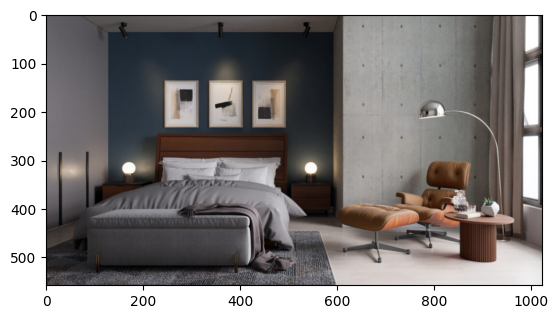

In [2]:
import torch
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from PIL import Image
import os
import matplotlib.pyplot as plt

# Función para cargar el modelo y los componentes necesarios
def load_model():
    model_name = "nlpconnect/vit-gpt2-image-captioning"
    model = VisionEncoderDecoderModel.from_pretrained(model_name)
    feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return model, feature_extractor, tokenizer

# Función para preprocesar la imagen
def preprocess_image(image_path, feature_extractor):
    try:
        image = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"Error al abrir la imagen: {e}")
        return None
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    return pixel_values

# Función para generar la descripción de la imagen
def generate_caption(image_path, model, feature_extractor, tokenizer, device):
    pixel_values = preprocess_image(image_path, feature_extractor)
    if pixel_values is None:
        return None

    # Mover los valores de los píxeles al dispositivo
    pixel_values = pixel_values.to(device)

    # Generar la descripción
    output_ids = model.generate(pixel_values, max_length=50, num_beams=4, early_stopping=True)
    description = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
    return description

# Función principal
def main(image_path):
    # Cargar el modelo y los componentes
    model, feature_extractor, tokenizer = load_model()

    # Configurar el dispositivo (CPU o GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Generar la descripción de la imagen
    description = generate_caption(image_path, model, feature_extractor, tokenizer, device)
    if description:
        print(f"Descripción generada: {description}")
        image = Image.open(image_path)
        plt.imshow(image)
        plt.show()


    else:
        print("No se pudo generar una descripción.")

# Ruta de la imagen
image_path = 'imgs/cuarto.jpg'

# Verificar si la imagen existe antes de proceder
if os.path.exists(image_path):
    main(image_path)
else:
    print(f"La imagen {image_path} no existe.")

#carga un modelo preentrenado de Hugging Face que combina un modelo de visión (ViT) con un modelo de lenguaje (GPT-2) 

**V2**

Descripción generada: a group of people sitting on the grass in a park


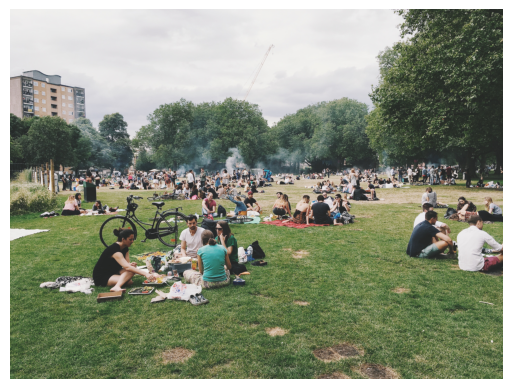

In [18]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import os
import matplotlib.pyplot as plt

# Función para cargar el modelo y el procesador BLIP
def load_blip_model():
    model_name = "Salesforce/blip-image-captioning-base"
    model = BlipForConditionalGeneration.from_pretrained(model_name)
    processor = BlipProcessor.from_pretrained(model_name)
    return model, processor

# Función para preprocesar la imagen
def preprocess_image(image_path, processor):
    try:
        image = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"Error al abrir la imagen: {e}")
        return None
    inputs = processor(images=image, return_tensors="pt")
    return inputs

# Función para generar la descripción de la imagen
def generate_caption(image_path, model, processor, device):
    inputs = preprocess_image(image_path, processor)
    if inputs is None:
        return None

    # Mover los tensores al dispositivo
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generar la descripción
    output_ids = model.generate(**inputs, max_length=50, num_beams=4, early_stopping=True)
    description = processor.decode(output_ids[0], skip_special_tokens=True)
    
    return description

# Función principal
def main(image_path):
    # Cargar el modelo y el procesador
    model, processor = load_blip_model()

    # Configurar el dispositivo (CPU o GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Generar la descripción de la imagen
    description = generate_caption(image_path, model, processor, device)
    if description:
        print(f"Descripción generada: {description}")
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        print("No se pudo generar una descripción.")

# Ruta de la imagen
image_path = 'imgs/parque.jpg'

# Verificar si la imagen existe antes de proceder
if os.path.exists(image_path):
    main(image_path)
else:
    print(f"La imagen {image_path} no existe.")

